# House Prices Preprosesing<a class="anchor" id="0-bullet"></a>

* [1. Loading libraries and data](#1-bullet)
* [2. EDA](#2-bullet)
  * [2.1 Review](#2.1-bullet)
  * [2.2 Analysis](#2.2-bullet)
* [3. Data Preparation](#3-bullet)
  * [3.1 Clean the data](#3.1-bullet)
    * [3.1.1 Drop NaN](#3.1.1-bullet)
  * [3.2 Numerical features transformation](#3.2-bullet)
  * [3.3 Create new features](#3.3-bullet)
  * [3.4  Dividing dataset](#3.4-bullet)
* [4. Baseline](#4-bullet)

Competition from [kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description).
![**Competition Description**](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

**Competition Description**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## 1. Loading libraries and data<a class="anchor" id="1-bullet"></a>
[back to the table of contents](#0-bullet)

In [447]:
#for displaying all pins - not only last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import time

#data
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
#plt.xkcd(); - for xkcd fans
sns.set_style('darkgrid')


#for learning baseline-model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [378]:
df_train = pd.read_csv('/data/train.csv')
df_test = pd.read_csv('/data/test.csv')

In [379]:
#function for concating
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [380]:
df_all = concat_df(df_train.drop('SalePrice', axis=1 ), df_test)

In [381]:
'Train lines = {}'.format(df_train.shape[0])
'Test lines = {}'.format(df_test.shape[0])
'All lines = {}'.format(df_all.shape[0])
'Train Shape (x) = {}'.format(df_train.shape)
'Train target (y) = {}'.format(df_train['SalePrice'].shape[0])
'Test Shape (x) = {}'.format(df_test.shape)
'Test target (y) = {}'.format(df_test.shape[0])

'Train columns: {}'.format(df_train.columns.to_list())
'Test columns: {}'.format(df_test.columns.to_list())

'Train lines = 1460'

'Test lines = 1459'

'All lines = 2919'

'Train Shape (x) = (1460, 81)'

'Train target (y) = 1460'

'Test Shape (x) = (1459, 80)'

'Test target (y) = 1459'

"Train columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Poo

"Test columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [382]:
#function for dividing
def divide_df(all_data):
    return all_data.loc[:1459], all_data.loc[1460:]

## 2. EDA<a class="anchor" id="2-bullet"></a>
[back to the table of contents](#0-bullet)

### 2.1 Review<a class="anchor" id="2.1-bullet"></a>

There are all infromation about features in [file](data_description.txt).

In [383]:
df_train.dtypes.value_counts()
df_train

object     43
int64      35
float64     3
dtype: int64

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [384]:
df_test.dtypes.value_counts()
df_test

object     43
int64      26
float64    11
dtype: int64

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [385]:
df_all.dtypes.value_counts()
df_all

object     43
int64      26
float64    11
dtype: int64

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2915,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2916,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
2917,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


### 2.2 Analysis<a class="anchor" id="2.2-bullet"></a>

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


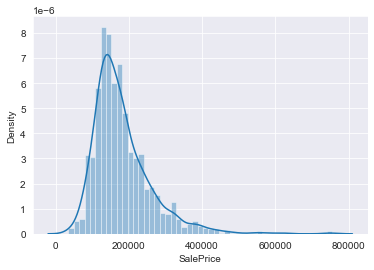

In [386]:
sns.distplot(df_train['SalePrice']);

**Sale Price:**

-  Deviate from the normal distribution.
-  Have appreciable positive skewness.
-  Show peakedness.

In [387]:
numerical_features = df_all[list(df_all._get_numeric_data().columns)].reset_index(drop=True)
categorical_features = df_all[list(set(df_all.columns) - set(df_all._get_numeric_data().columns))].reset_index(drop=True)

len(numerical_features.columns)
numerical_features.columns.to_list()
len(categorical_features.columns)
categorical_features.columns.to_list()

37

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

43

['Foundation',
 'Alley',
 'BsmtFinType2',
 'LandSlope',
 'MasVnrType',
 'GarageType',
 'ExterQual',
 'GarageCond',
 'LotShape',
 'LotConfig',
 'Condition1',
 'GarageQual',
 'KitchenQual',
 'Utilities',
 'GarageFinish',
 'Street',
 'RoofMatl',
 'Heating',
 'HouseStyle',
 'Electrical',
 'FireplaceQu',
 'Condition2',
 'LandContour',
 'BsmtCond',
 'Neighborhood',
 'CentralAir',
 'ExterCond',
 'Functional',
 'Exterior1st',
 'BldgType',
 'SaleCondition',
 'PoolQC',
 'RoofStyle',
 'Exterior2nd',
 'HeatingQC',
 'MiscFeature',
 'MSZoning',
 'Fence',
 'SaleType',
 'BsmtExposure',
 'BsmtFinType1',
 'PavedDrive',
 'BsmtQual']

In [388]:
num_features = ['LotFrontage','LotArea', 'MasVnrArea',
                'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF',
                'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
                'LowQualFinSF','GrLivArea',
                'GarageArea','WoodDeckSF','OpenPorchSF',
                'EnclosedPorch','3SsnPorch','ScreenPorch', 
                'PoolArea', 'MiscVal'] 

cat_num_features = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath',
                    'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr',
                    'KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 
                    'GarageCars', 'MoSold', 'YrSold', 'GarageYrBlt','YearBuilt', 'YearRemodAdd']

cat_features = [
    'MSZoning', 'Street', 'Alley', 'LotShape', 
    'LandContour', 'Utilities', 'LotConfig', 
    'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle',
    'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'ExterQual',
    'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'Heating', 'HeatingQC',
    'CentralAir', 'Electrical', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
    'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'MSZoning')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'MSZoning'}>

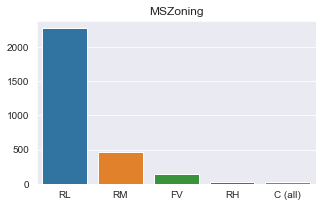

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Street')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Street'}>

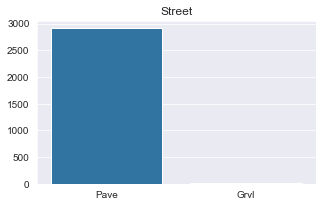

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Alley')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Alley'}>

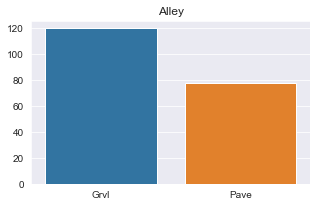

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'LotShape')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'LotShape'}>

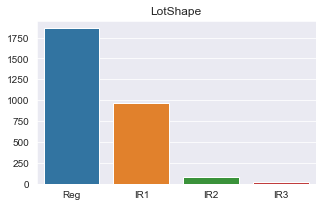

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'LandContour')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'LandContour'}>

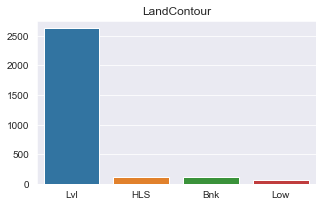

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Utilities')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Utilities'}>

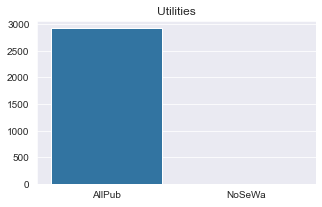

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'LotConfig')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'LotConfig'}>

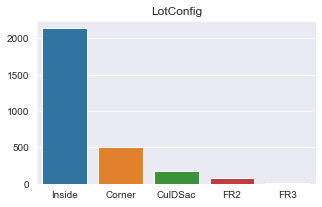

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'LandSlope')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'LandSlope'}>

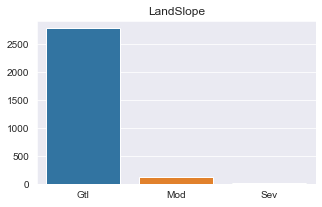

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Neighborhood')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Neighborhood'}>

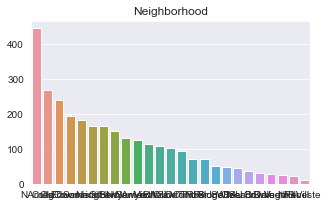

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Condition1')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Condition1'}>

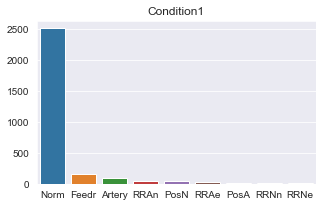

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Condition2')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Condition2'}>

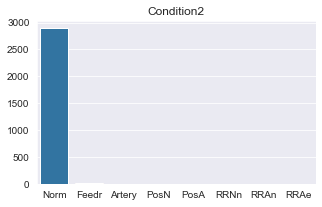

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'BldgType')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BldgType'}>

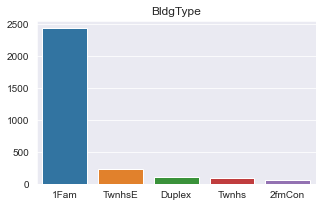

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'HouseStyle')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'HouseStyle'}>

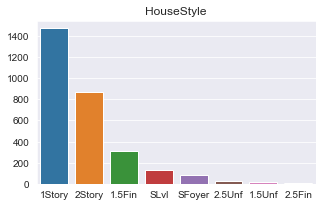

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'RoofStyle')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'RoofStyle'}>

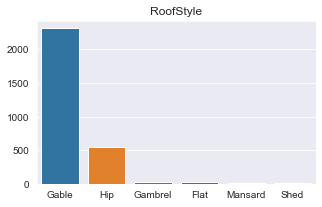

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'RoofMatl')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'RoofMatl'}>

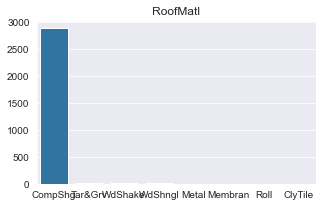

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Exterior1st')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Exterior1st'}>

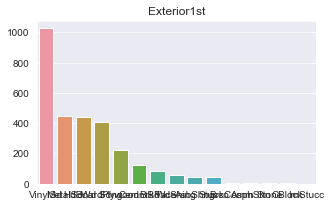

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Exterior2nd')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Exterior2nd'}>

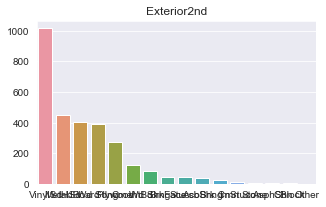

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'MasVnrType')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'MasVnrType'}>

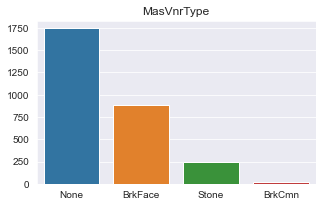

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'ExterQual')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'ExterQual'}>

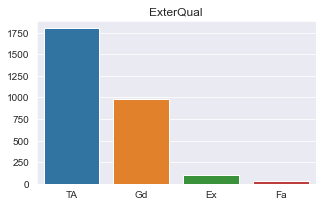

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'ExterCond')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'ExterCond'}>

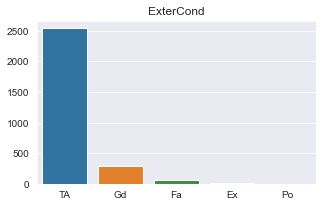

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Foundation')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Foundation'}>

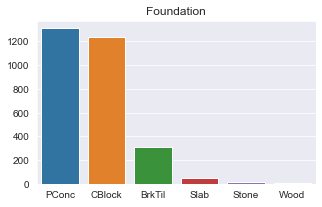

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'BsmtQual')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BsmtQual'}>

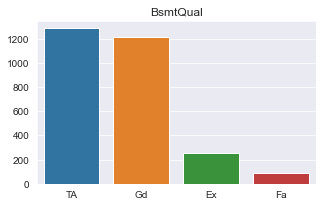

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'BsmtCond')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BsmtCond'}>

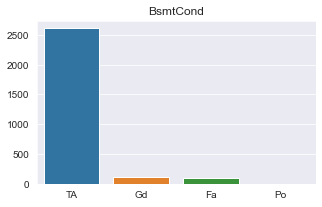

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'BsmtExposure')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BsmtExposure'}>

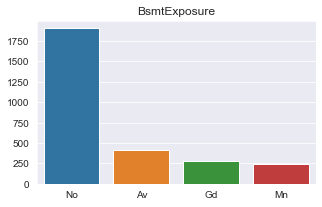

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'BsmtFinType1')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BsmtFinType1'}>

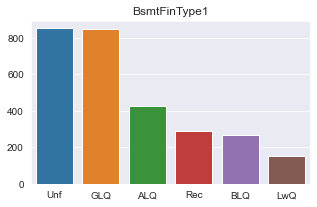

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'BsmtFinType2')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BsmtFinType2'}>

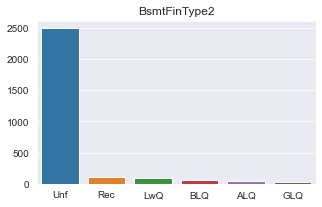

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Heating')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Heating'}>

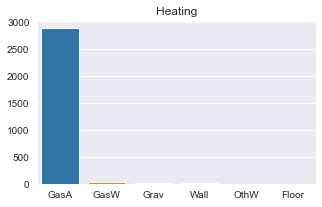

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'HeatingQC')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'HeatingQC'}>

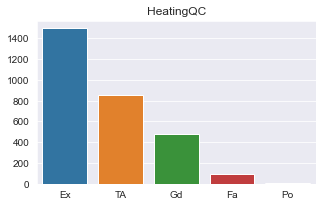

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'CentralAir')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CentralAir'}>

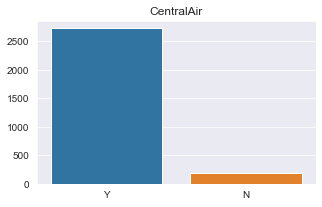

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Electrical')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Electrical'}>

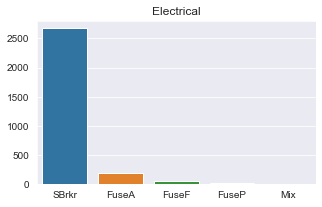

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'KitchenQual')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'KitchenQual'}>

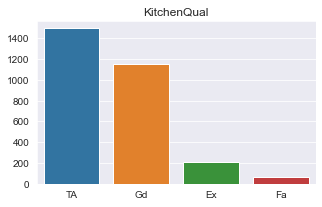

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Functional')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Functional'}>

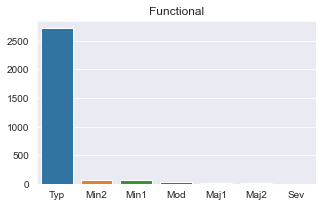

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'FireplaceQu')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'FireplaceQu'}>

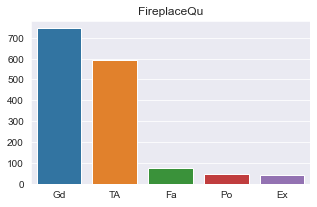

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'GarageType')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'GarageType'}>

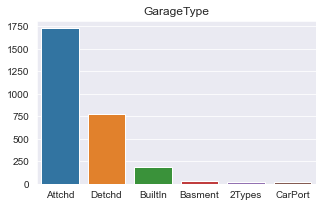

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'GarageFinish')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'GarageFinish'}>

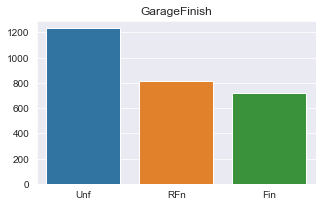

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'GarageQual')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'GarageQual'}>

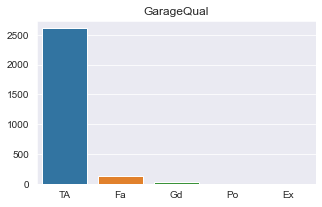

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'GarageCond')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'GarageCond'}>

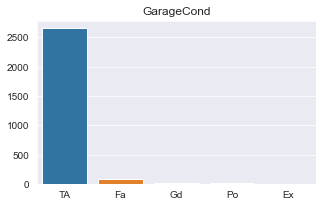

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'PavedDrive')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'PavedDrive'}>

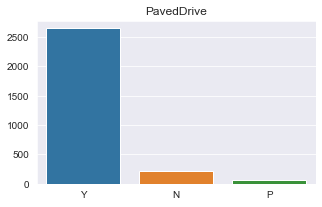

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'PoolQC')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'PoolQC'}>

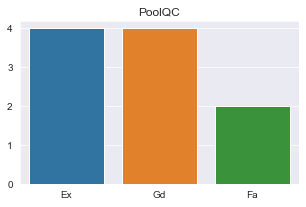

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'Fence')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Fence'}>

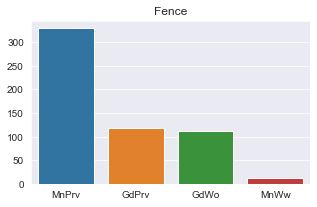

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'MiscFeature')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'MiscFeature'}>

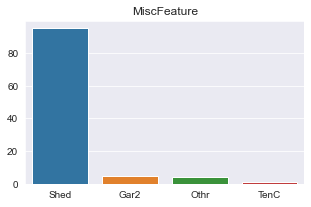

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'SaleType')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'SaleType'}>

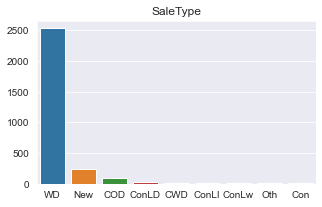

<Figure size 360x216 with 0 Axes>

Text(0.5, 1.0, 'SaleCondition')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'SaleCondition'}>

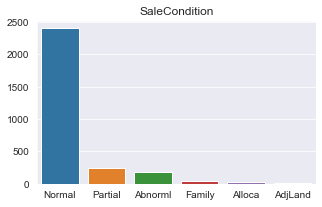

In [389]:
for x in cat_features:
    counts = df_all[x].value_counts()
    plt.figure(figsize=(5,3))    
    plt.title(x)
    sns.barplot(counts.index, counts.values);
    plt.show()

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'MSZoning')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'MSZoning'}, xlabel='SalePrice', ylabel='MSZoning'>

Text(0.5, 1.0, 'Distribution of SalePrice by MSZoning')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'MSZoning')

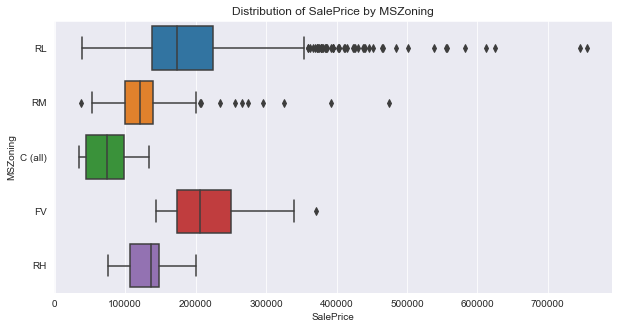

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Street')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Street'}, xlabel='SalePrice', ylabel='Street'>

Text(0.5, 1.0, 'Distribution of SalePrice by Street')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Street')

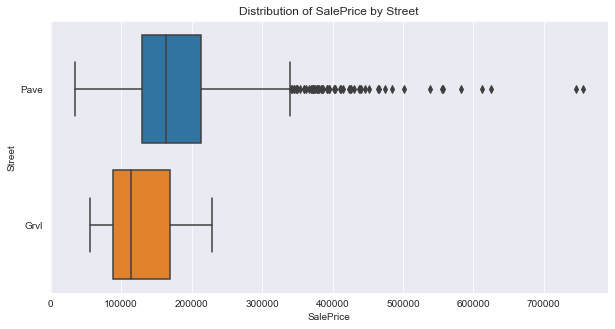

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Alley')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Alley'}, xlabel='SalePrice', ylabel='Alley'>

Text(0.5, 1.0, 'Distribution of SalePrice by Alley')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Alley')

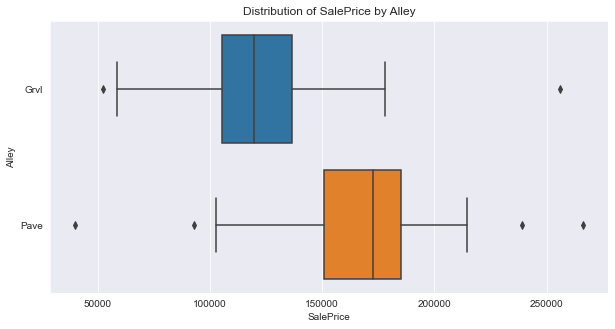

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'LotShape')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'LotShape'}, xlabel='SalePrice', ylabel='LotShape'>

Text(0.5, 1.0, 'Distribution of SalePrice by LotShape')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'LotShape')

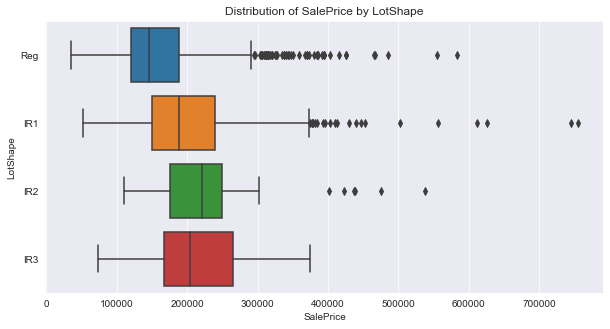

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'LandContour')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'LandContour'}, xlabel='SalePrice', ylabel='LandContour'>

Text(0.5, 1.0, 'Distribution of SalePrice by LandContour')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'LandContour')

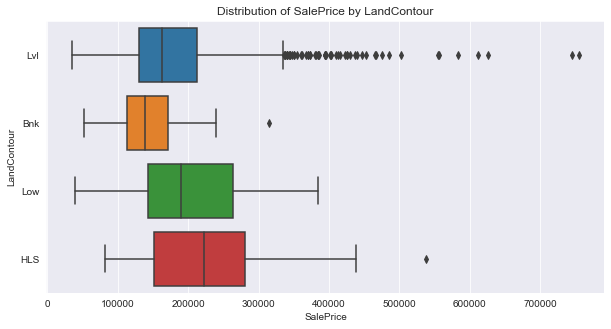

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Utilities')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Utilities'}, xlabel='SalePrice', ylabel='Utilities'>

Text(0.5, 1.0, 'Distribution of SalePrice by Utilities')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Utilities')

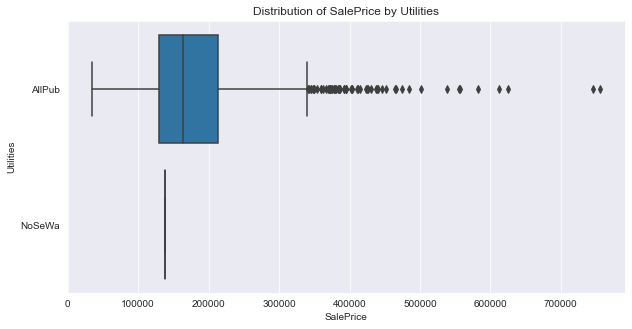

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'LotConfig')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'LotConfig'}, xlabel='SalePrice', ylabel='LotConfig'>

Text(0.5, 1.0, 'Distribution of SalePrice by LotConfig')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'LotConfig')

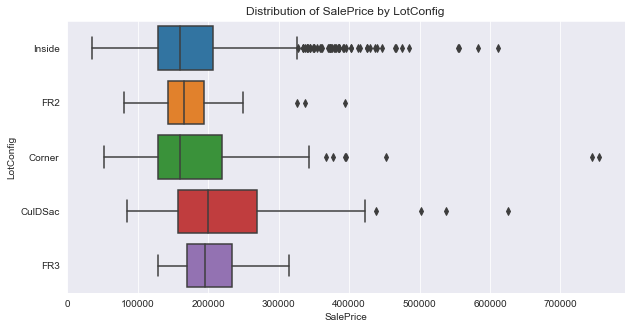

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'LandSlope')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'LandSlope'}, xlabel='SalePrice', ylabel='LandSlope'>

Text(0.5, 1.0, 'Distribution of SalePrice by LandSlope')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'LandSlope')

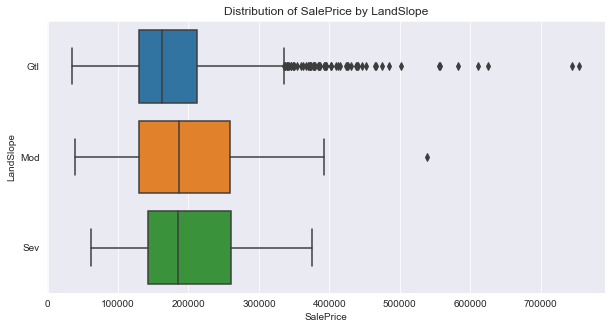

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Neighborhood')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Neighborhood'}, xlabel='SalePrice', ylabel='Neighborhood'>

Text(0.5, 1.0, 'Distribution of SalePrice by Neighborhood')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Neighborhood')

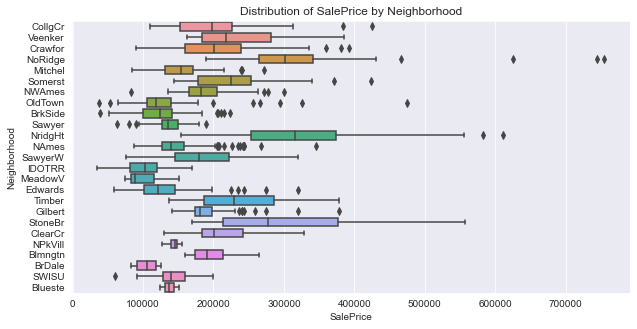

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Condition1')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Condition1'}, xlabel='SalePrice', ylabel='Condition1'>

Text(0.5, 1.0, 'Distribution of SalePrice by Condition1')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Condition1')

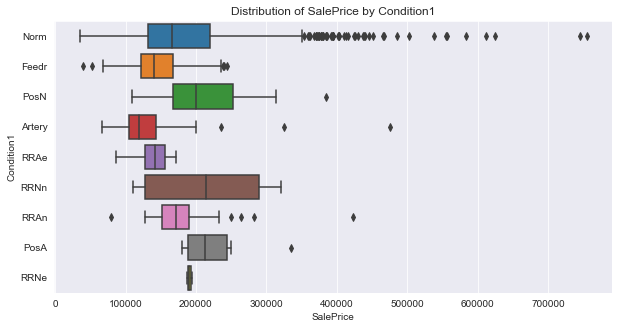

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Condition2')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Condition2'}, xlabel='SalePrice', ylabel='Condition2'>

Text(0.5, 1.0, 'Distribution of SalePrice by Condition2')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Condition2')

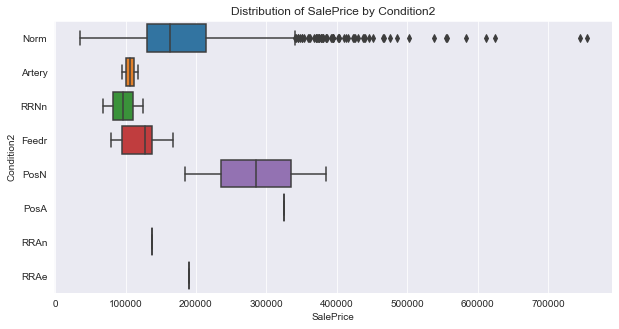

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'BldgType')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BldgType'}, xlabel='SalePrice', ylabel='BldgType'>

Text(0.5, 1.0, 'Distribution of SalePrice by BldgType')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'BldgType')

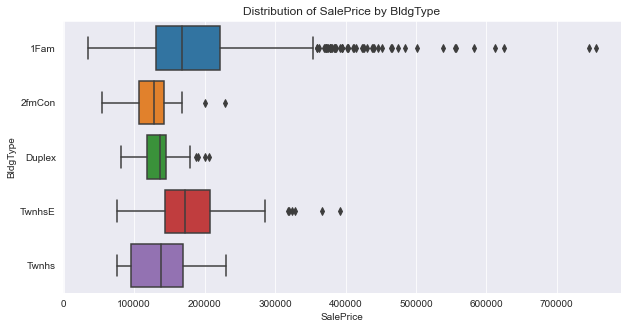

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'HouseStyle')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'HouseStyle'}, xlabel='SalePrice', ylabel='HouseStyle'>

Text(0.5, 1.0, 'Distribution of SalePrice by HouseStyle')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'HouseStyle')

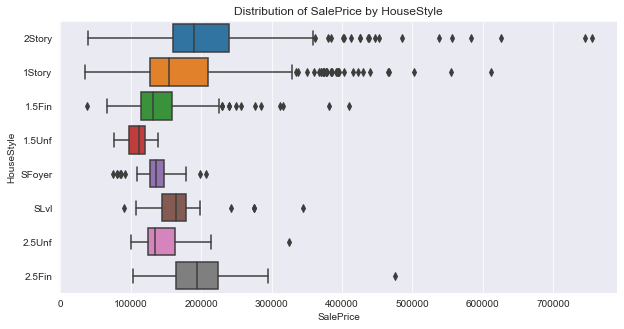

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'RoofStyle')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'RoofStyle'}, xlabel='SalePrice', ylabel='RoofStyle'>

Text(0.5, 1.0, 'Distribution of SalePrice by RoofStyle')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'RoofStyle')

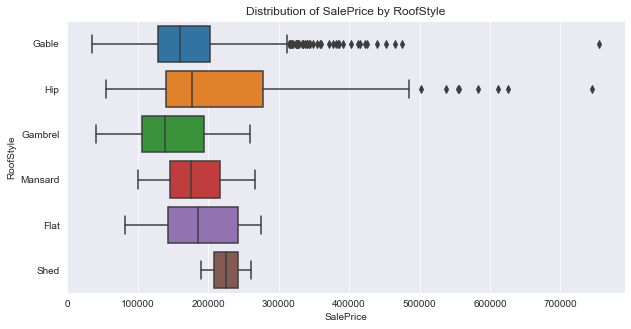

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'RoofMatl')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'RoofMatl'}, xlabel='SalePrice', ylabel='RoofMatl'>

Text(0.5, 1.0, 'Distribution of SalePrice by RoofMatl')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'RoofMatl')

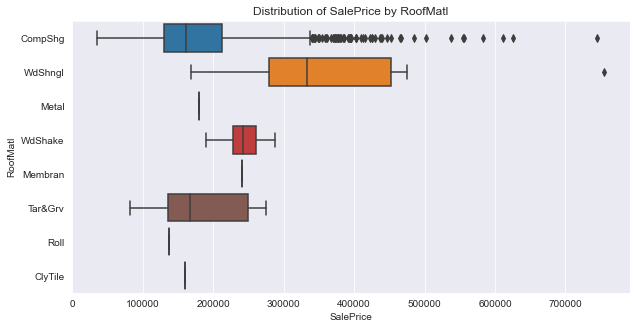

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Exterior1st')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Exterior1st'}, xlabel='SalePrice', ylabel='Exterior1st'>

Text(0.5, 1.0, 'Distribution of SalePrice by Exterior1st')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Exterior1st')

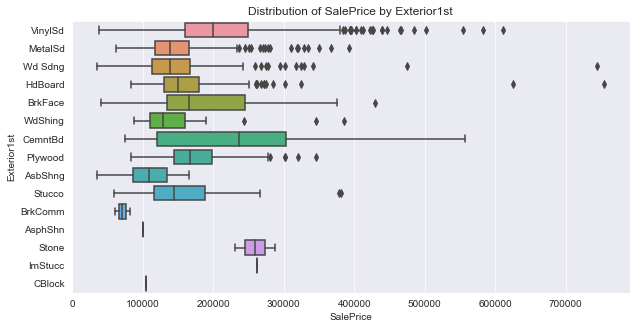

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Exterior2nd')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Exterior2nd'}, xlabel='SalePrice', ylabel='Exterior2nd'>

Text(0.5, 1.0, 'Distribution of SalePrice by Exterior2nd')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Exterior2nd')

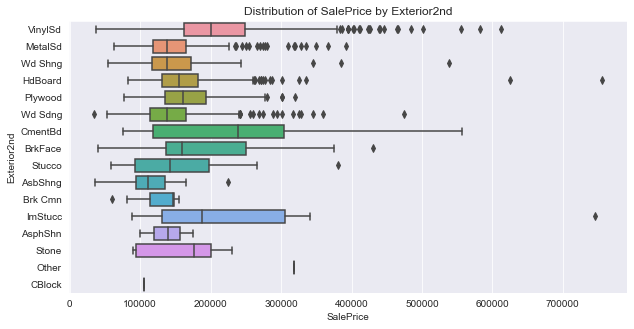

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'MasVnrType')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'MasVnrType'}, xlabel='SalePrice', ylabel='MasVnrType'>

Text(0.5, 1.0, 'Distribution of SalePrice by MasVnrType')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'MasVnrType')

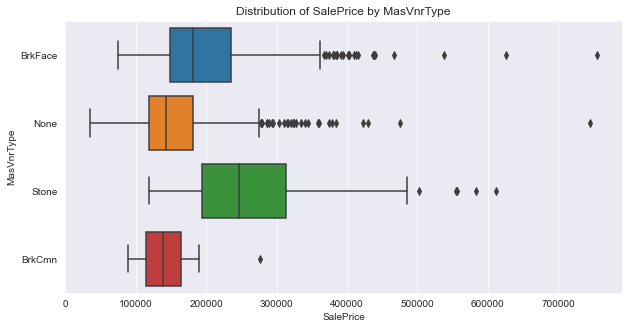

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'ExterQual')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'ExterQual'}, xlabel='SalePrice', ylabel='ExterQual'>

Text(0.5, 1.0, 'Distribution of SalePrice by ExterQual')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'ExterQual')

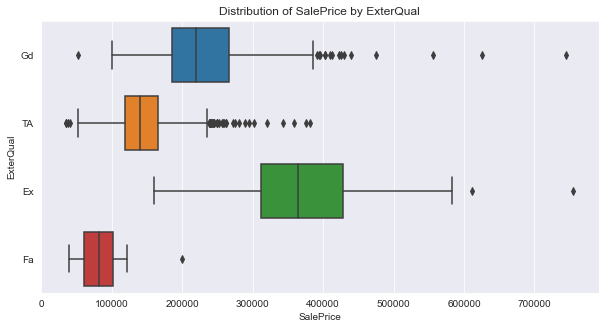

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'ExterCond')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'ExterCond'}, xlabel='SalePrice', ylabel='ExterCond'>

Text(0.5, 1.0, 'Distribution of SalePrice by ExterCond')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'ExterCond')

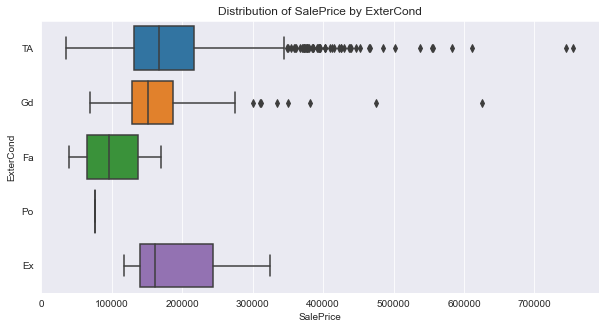

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Foundation')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Foundation'}, xlabel='SalePrice', ylabel='Foundation'>

Text(0.5, 1.0, 'Distribution of SalePrice by Foundation')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Foundation')

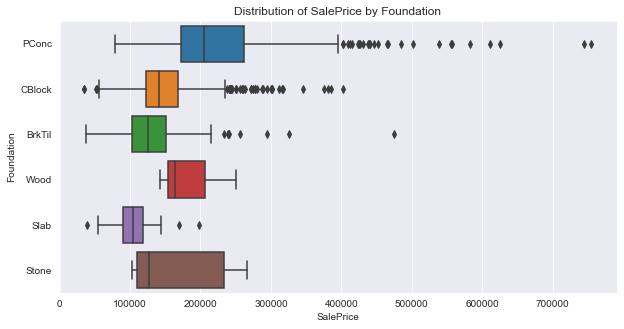

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'BsmtQual')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BsmtQual'}, xlabel='SalePrice', ylabel='BsmtQual'>

Text(0.5, 1.0, 'Distribution of SalePrice by BsmtQual')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'BsmtQual')

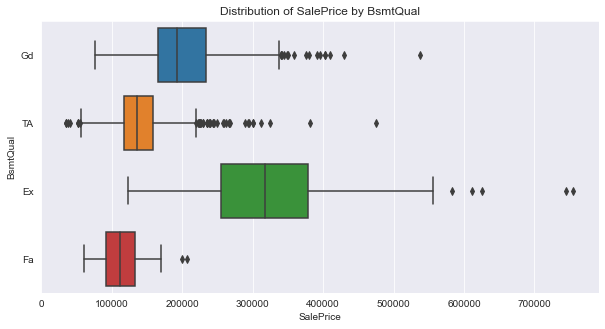

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'BsmtCond')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BsmtCond'}, xlabel='SalePrice', ylabel='BsmtCond'>

Text(0.5, 1.0, 'Distribution of SalePrice by BsmtCond')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'BsmtCond')

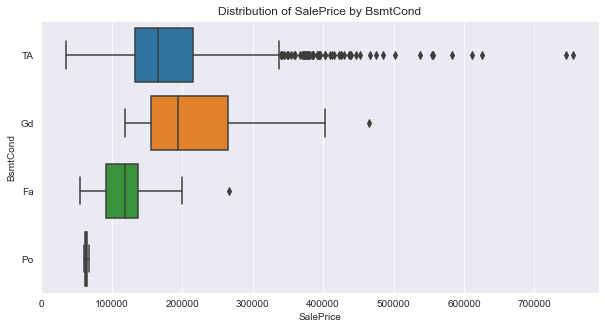

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'BsmtExposure')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BsmtExposure'}, xlabel='SalePrice', ylabel='BsmtExposure'>

Text(0.5, 1.0, 'Distribution of SalePrice by BsmtExposure')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'BsmtExposure')

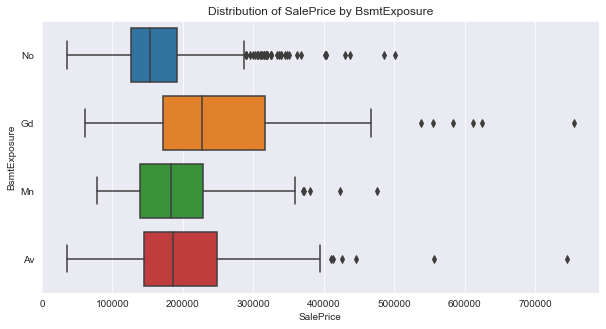

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'BsmtFinType1')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BsmtFinType1'}, xlabel='SalePrice', ylabel='BsmtFinType1'>

Text(0.5, 1.0, 'Distribution of SalePrice by BsmtFinType1')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'BsmtFinType1')

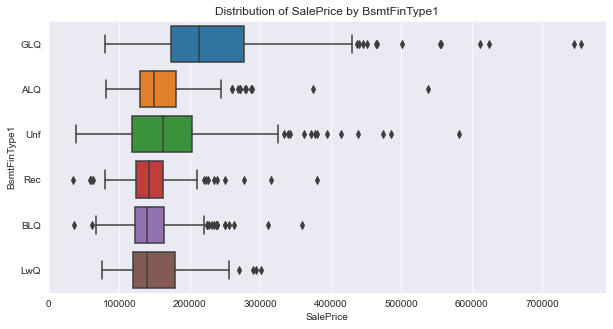

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'BsmtFinType2')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'BsmtFinType2'}, xlabel='SalePrice', ylabel='BsmtFinType2'>

Text(0.5, 1.0, 'Distribution of SalePrice by BsmtFinType2')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'BsmtFinType2')

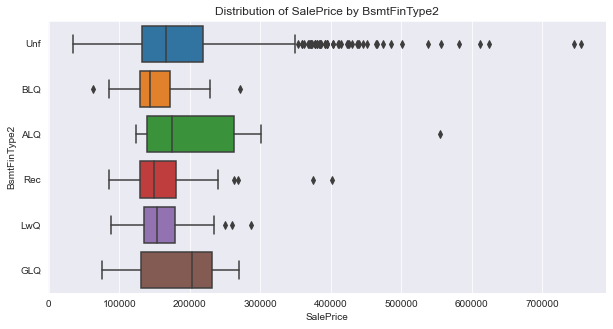

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Heating')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Heating'}, xlabel='SalePrice', ylabel='Heating'>

Text(0.5, 1.0, 'Distribution of SalePrice by Heating')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Heating')

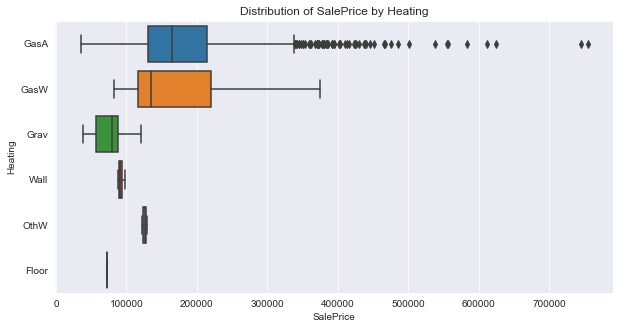

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'HeatingQC')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'HeatingQC'}, xlabel='SalePrice', ylabel='HeatingQC'>

Text(0.5, 1.0, 'Distribution of SalePrice by HeatingQC')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'HeatingQC')

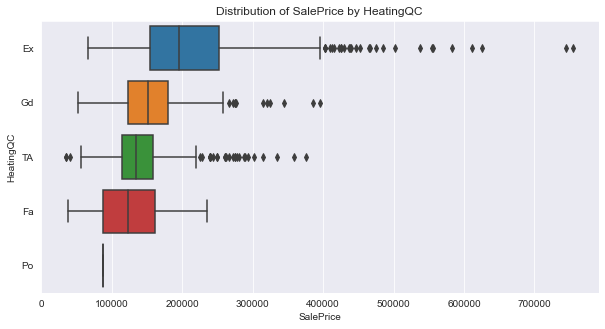

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'CentralAir')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CentralAir'}, xlabel='SalePrice', ylabel='CentralAir'>

Text(0.5, 1.0, 'Distribution of SalePrice by CentralAir')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'CentralAir')

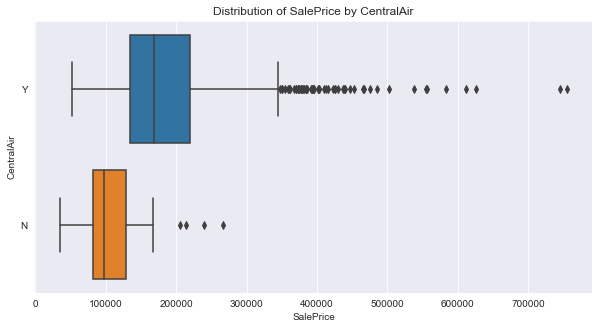

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Electrical')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Electrical'}, xlabel='SalePrice', ylabel='Electrical'>

Text(0.5, 1.0, 'Distribution of SalePrice by Electrical')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Electrical')

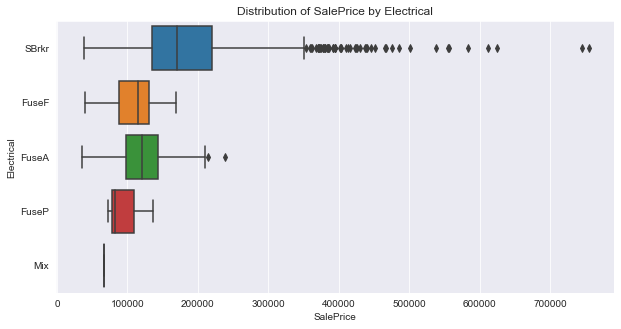

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'KitchenQual')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'KitchenQual'}, xlabel='SalePrice', ylabel='KitchenQual'>

Text(0.5, 1.0, 'Distribution of SalePrice by KitchenQual')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'KitchenQual')

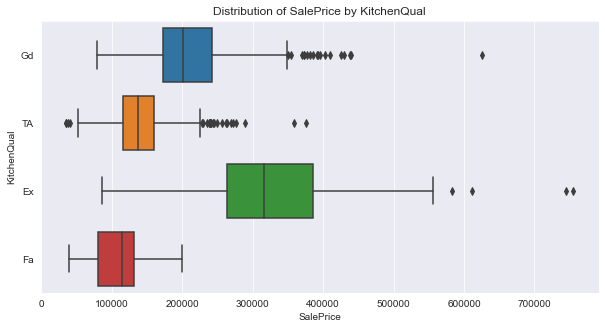

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Functional')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Functional'}, xlabel='SalePrice', ylabel='Functional'>

Text(0.5, 1.0, 'Distribution of SalePrice by Functional')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Functional')

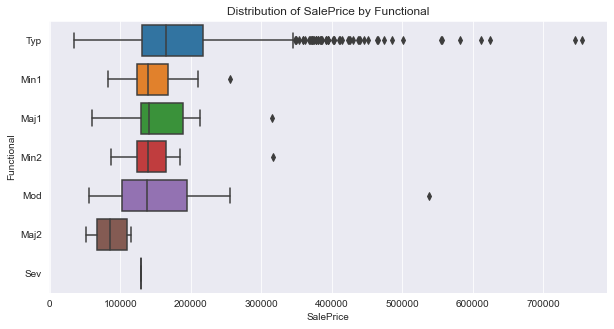

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'FireplaceQu')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'FireplaceQu'}, xlabel='SalePrice', ylabel='FireplaceQu'>

Text(0.5, 1.0, 'Distribution of SalePrice by FireplaceQu')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'FireplaceQu')

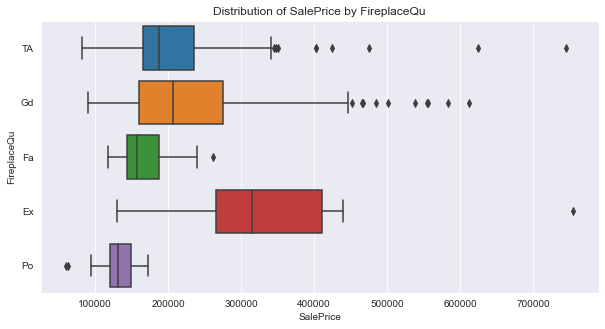

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'GarageType')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'GarageType'}, xlabel='SalePrice', ylabel='GarageType'>

Text(0.5, 1.0, 'Distribution of SalePrice by GarageType')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'GarageType')

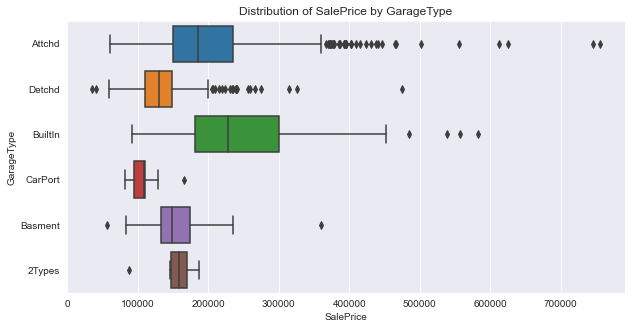

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'GarageFinish')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'GarageFinish'}, xlabel='SalePrice', ylabel='GarageFinish'>

Text(0.5, 1.0, 'Distribution of SalePrice by GarageFinish')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'GarageFinish')

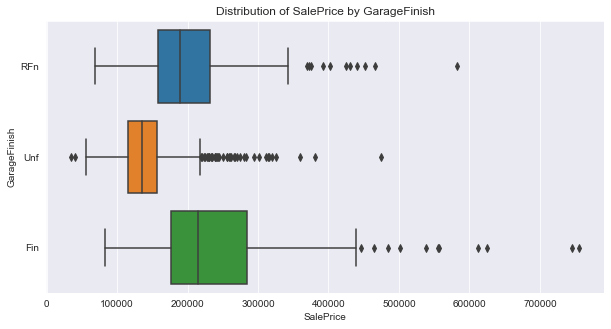

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'GarageQual')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'GarageQual'}, xlabel='SalePrice', ylabel='GarageQual'>

Text(0.5, 1.0, 'Distribution of SalePrice by GarageQual')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'GarageQual')

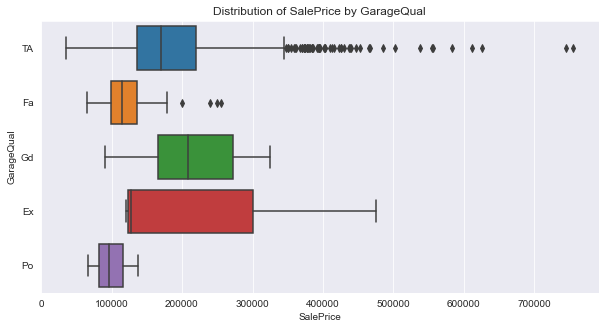

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'GarageCond')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'GarageCond'}, xlabel='SalePrice', ylabel='GarageCond'>

Text(0.5, 1.0, 'Distribution of SalePrice by GarageCond')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'GarageCond')

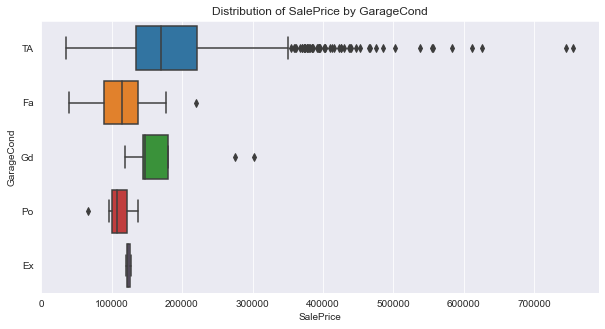

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'PavedDrive')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'PavedDrive'}, xlabel='SalePrice', ylabel='PavedDrive'>

Text(0.5, 1.0, 'Distribution of SalePrice by PavedDrive')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'PavedDrive')

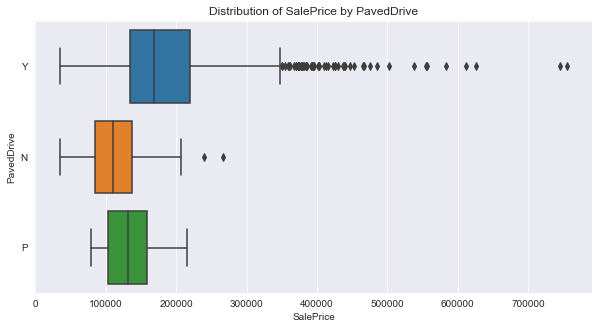

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'PoolQC')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'PoolQC'}, xlabel='SalePrice', ylabel='PoolQC'>

Text(0.5, 1.0, 'Distribution of SalePrice by PoolQC')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'PoolQC')

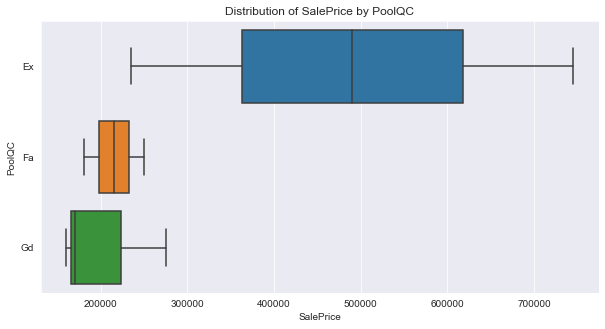

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Fence')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Fence'}, xlabel='SalePrice', ylabel='Fence'>

Text(0.5, 1.0, 'Distribution of SalePrice by Fence')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Fence')

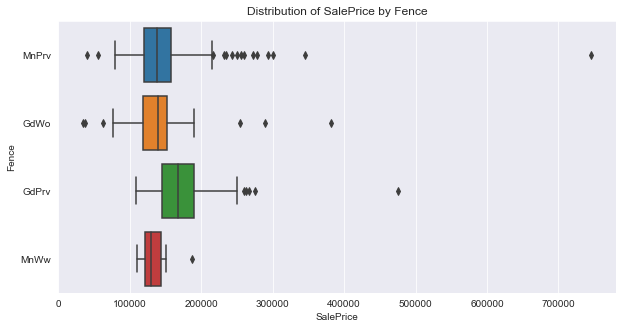

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'MiscFeature')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'MiscFeature'}, xlabel='SalePrice', ylabel='MiscFeature'>

Text(0.5, 1.0, 'Distribution of SalePrice by MiscFeature')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'MiscFeature')

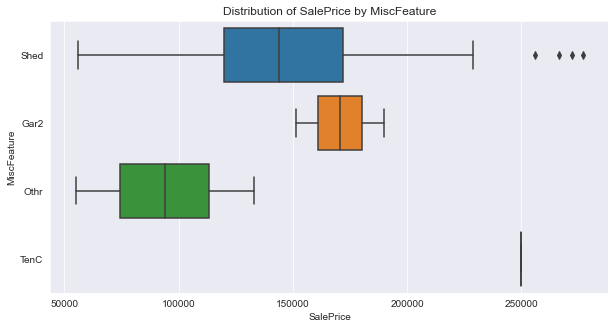

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'SaleType')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'SaleType'}, xlabel='SalePrice', ylabel='SaleType'>

Text(0.5, 1.0, 'Distribution of SalePrice by SaleType')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'SaleType')

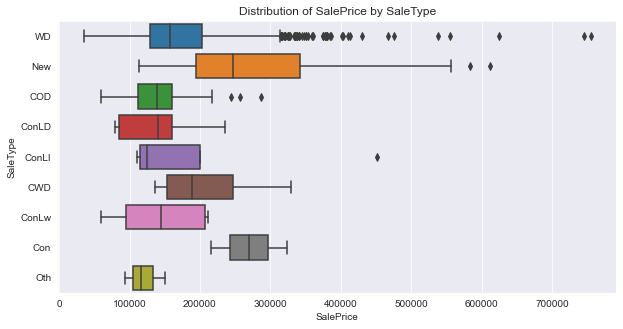

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'SaleCondition')

/Users/arinaskanova/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'SaleCondition'}, xlabel='SalePrice', ylabel='SaleCondition'>

Text(0.5, 1.0, 'Distribution of SalePrice by SaleCondition')

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'SaleCondition')

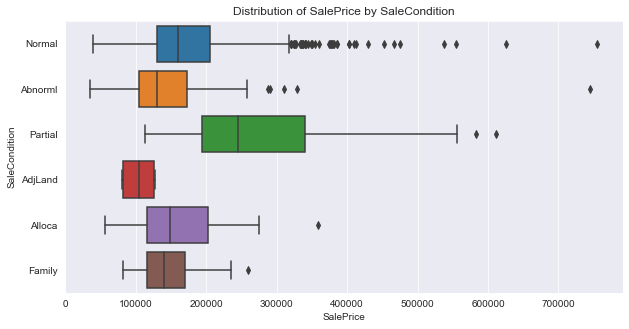

In [390]:
for x in cat_features:
    counts = df_train[x].value_counts()
    plt.figure(figsize=(10,5))    
    plt.title(x)
    sns.boxplot(df_train['SalePrice'], df_train[x])
    plt.title('Distribution of SalePrice by ' + x)
    plt.xlabel('SalePrice')
    plt.ylabel(x)
    plt.show()

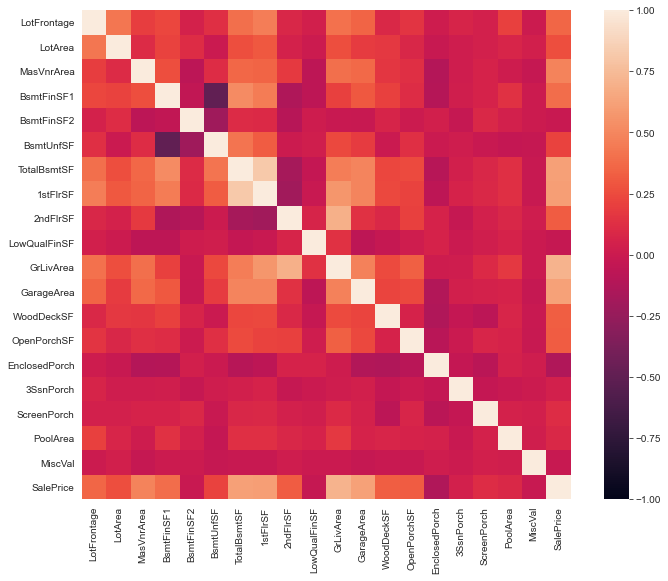

In [391]:
df = pd.concat([df_train[num_features],df_train['SalePrice']], axis=1)

#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1,vmin=-1, square=True);

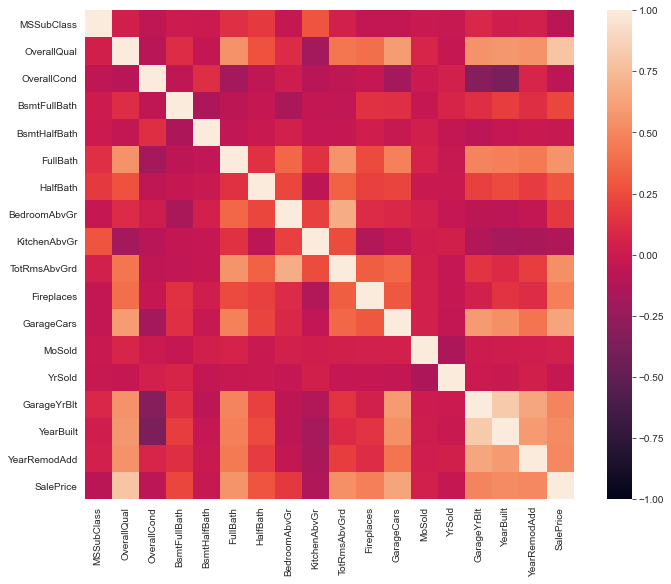

In [392]:
df = pd.concat([df_train[cat_num_features],df_train['SalePrice']], axis=1)

#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1,vmin=-1 ,square=True);

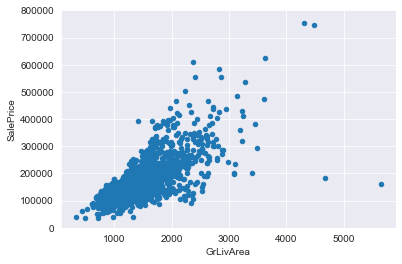

In [393]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000)); # there is a linear trend

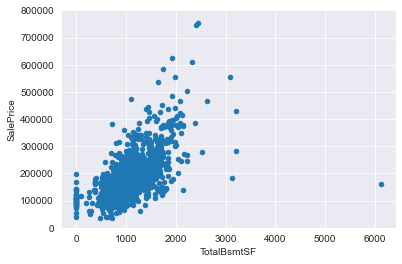

In [394]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000)); #there is an exponential trend

## 3. Data Preparation<a class="anchor" id="3-bullet"></a>
[back to the table of contents](#0-bullet)

### 3.1 Clean the data<a class="anchor" id="3.1-bullet"></a>

Drop the 'Id' colum decause it's unnecessary for the prediction process.

In [395]:
df_all.drop('Id', axis = 1, inplace = True)

#### 3.1.1 Drop NaN<a class="anchor" id="3.1.1-bullet"></a>

In [396]:
df = pd.DataFrame(df_all.isnull().sum())
df.rename(columns={0:'cnt'}, inplace =True)
df = df.query('cnt > 0').sort_values(by='cnt', ascending=False)
df

,cnt
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageQual,159
GarageYrBlt,159
GarageFinish,159


Replace the NA values as a category with No.

In [397]:
has_NA = ['Alley',
          'BsmtQual',
          'BsmtCond', 
          'BsmtExposure',
          'BsmtExposure',
          'BsmtFinType1',
          'BsmtFinType2',
          'FireplaceQu',
          'GarageType',
          'GarageFinish',
          'GarageQual',
          'GarageCond',
          'PoolQC',
          'Fence',
          'MiscFeature',
          'MasVnrType']
for x in has_NA:
    df_all[x] = df_all[x].fillna('No')

In [398]:
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)

In [399]:
# again check NaNs in the table
df = pd.DataFrame(df_all.isnull().sum())
df.rename(columns={0:'cnt'}, inplace =True)
df_has_NaN = df.query('cnt > 0').sort_values(by='cnt', ascending=False)
df_has_NaN

,cnt
LotFrontage,486
MasVnrArea,23
MSZoning,4
Utilities,2
BsmtFullBath,2
BsmtHalfBath,2
Functional,2
KitchenQual,1
TotalBsmtSF,1
SaleType,1


Fill in empty values for NaN in df_has_NaN.

In [400]:
df_global = df_all
df_global['LotFrontage'] = df_global.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_global['MasVnrArea']=df_global['MasVnrArea'].fillna(df_global['MasVnrArea'].median())
df_global['MSZoning'] = df_global.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
df_global['BsmtFullBath'] = df_global['BsmtFullBath'].fillna(df_global['BsmtFullBath'].median())
df_global['Utilities'] = df_global['Utilities'].fillna(df_global['Utilities'].mode()[0])
df_global['Functional'] = df_global['Functional'].fillna('Typ')
df_global['BsmtHalfBath'] = df_global['BsmtHalfBath'].fillna(df_global['BsmtHalfBath'].median())
df_global['GarageArea'] = df_global['GarageArea'].fillna(df_global['GarageArea'].median())
df_global['GarageCars'] = df_global['GarageCars'].fillna(df_global['GarageCars'].mode()[0])
df_global['KitchenQual'] = df_global['KitchenQual'].fillna('TA')
df_global['BsmtUnfSF'] = df_global['BsmtUnfSF'].fillna(df_global['BsmtUnfSF'].median())
df_global['Electrical'] = df_global['Electrical'].fillna('SBrkr')
df_global['TotalBsmtSF'] = df_global['TotalBsmtSF'].fillna(df_global['TotalBsmtSF'].median())
df_global['BsmtFinSF2'] = df_global['BsmtFinSF2'].fillna(df_global['BsmtFinSF2'].median())
df_global['BsmtFinSF1'] = df_global['BsmtFinSF1'].fillna(df_global['BsmtFinSF1'].median())
df_global['Exterior2nd'] = df_global['Exterior2nd'].fillna(df_global['Exterior2nd'].mode()[0])
df_global['Exterior1st'] = df_global['Exterior1st'].fillna(df_global['Exterior1st'].mode()[0])
df_global['SaleType'] = df_global['SaleType'].fillna(df_global['SaleType'].mode()[0])

In [401]:
# again check NaNs in the table
df_global.isnull().sum().value_counts()

0    79
dtype: int64

### 3.2 Numerical features Transformation <a class="anchor" id="3.2-bullet"></a>

[Text(0, 0.5, 'Feature names')]

[Text(0.5, 0, 'Numeric values')]

[Text(0.5, 1.0, 'Numeric Distribution of Features')]

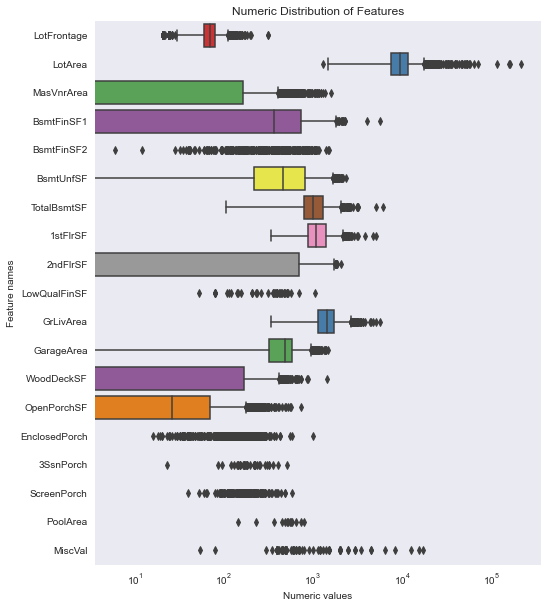

In [402]:
f, ax = plt.subplots(figsize=(8, 10))
ax.set_xscale("log")
ax = sns.boxplot(data=df_global[num_features] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [403]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
scaler = StandardScaler()
df_global[num_features] = scaler.fit_transform(df_global[num_features])
df_global[num_features] = RobustScaler().fit_transform(df_global[num_features])

[Text(0.5, 0, 'Feature names')]

[Text(0, 0.5, 'Feature names')]

[Text(0.5, 0, 'Numeric values')]

[Text(0.5, 1.0, 'Numeric Distribution of Features')]

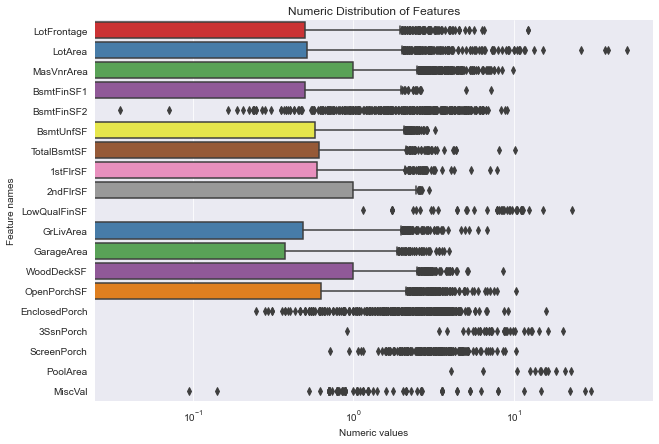

In [404]:
f, ax = plt.subplots(figsize=(10, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_global[num_features] , orient="h", palette="Set1")
ax.set(xlabel="Feature names")
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [405]:
df_global.drop('BsmtFinSF2', axis=1, inplace=True)
df_global.drop('LowQualFinSF', axis=1, inplace=True)
df_global.drop('EnclosedPorch', axis=1, inplace=True)
df_global.drop('3SsnPorch', axis=1, inplace=True)
df_global.drop('ScreenPorch', axis=1, inplace=True)
df_global.drop('PoolArea', axis=1, inplace=True)
df_global.drop('MiscVal', axis=1, inplace=True)

In [406]:
# # change all categorical numeric values to strings
# for x in cat_num_features:
#     df_global[x] = df_global[x].astype(str)

### 3.3 Create new features <a class="anchor" id="3.3-bullet"></a>

In [408]:
df_global['TotalSF'] = df_global['TotalBsmtSF'] + df_global['1stFlrSF'] + df_global['2ndFlrSF']      
df_global['YearsSinceRemodel'] = df_global['YrSold'].astype(int) - df_global['YearRemodAdd'].astype(int)
df_global['YrBltAndRemod'] = df_global['YearBuilt'].astype(int) + df_global['YearRemodAdd'].astype(int)
df_global['HouseAge'] = 2021 - df_global['YearBuilt'].astype(int)
df_global['Cat_HouseAge'] = pd.cut(df_global['HouseAge'], bins=[1, 5, 20, 80, 150], labels=['new', 'not new', 'old', 'very old'])
df_global['GarageAge'] = df_global['GarageYrBlt'].apply(lambda x: 0 if x == 0 or x > 2021 else int(2021 - x))
df_global['RemodAge'] = 2021 - df_global['YearRemodAdd'].astype(int)
df_global['Cat_RemodAge'] = pd.cut(df_global['RemodAge'], bins=[1, 5, 20, 80, 150], labels=['new', 'not new', 'old', 'very old'])

In [441]:
df_global_b = pd.get_dummies(df_global) #df_global_b - dataframe with one hot encoding
df_global_b.shape

(2919, 1189)

### 3.4 Dividing dataset <a class="anchor" id="3.4-bullet"></a>

In [442]:
df_global_train_x, df_global_test = divide_df(df_global_b)
df_global_train_y = df_train['SalePrice']

In [2]:
#saving clean data
train_x, test_x = divide_df(df_global)
train_y = df_train['SalePrice']

train_x.to_csv('/data/train_x', index=False)
train_y.to_csv('/data/train_y', index=False)
test.to_csv('/data/test', index=False)

NameError: name 'divide_df' is not defined

In [443]:
df_global_train_x.shape
df_global_train_x.head(3)

df_global_test.shape
df_global_test.head(3)

(1460, 1189)

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtUnfSF,GarageArea,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,...,RemodAge_66,RemodAge_67,RemodAge_68,RemodAge_69,RemodAge_70,RemodAge_71,Cat_RemodAge_new,Cat_RemodAge_not new,Cat_RemodAge_old,Cat_RemodAge_very old
0,-0.441838,1.213068,0.460437,-0.541880,0.265625,0.430769,-0.245112,-0.25,1.198777,0.500000,...,0,0,0,0,0,0,0,1,0,0
1,0.351906,0.000000,0.831514,-0.312821,-0.078125,-0.294737,0.035924,0.50,0.000000,-0.371429,...,0,0,0,0,0,0,0,0,1,0
2,-0.316716,1.230114,0.160300,-0.056410,0.500000,0.553846,0.439150,-0.10,0.990826,0.228571,...,0,0,0,0,0,0,0,1,0,0


(1459, 1189)

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtUnfSF,GarageArea,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,...,RemodAge_66,RemodAge_67,RemodAge_68,RemodAge_69,RemodAge_70,RemodAge_71,Cat_RemodAge_new,Cat_RemodAge_not new,Cat_RemodAge_old,Cat_RemodAge_very old
1460,-0.363636,0.000000,0.135744,-0.336752,0.976562,-0.887449,0.530059,0.50,0.00000,-0.371429,...,0,0,0,0,0,0,0,0,1,0
1461,0.482893,0.000000,0.756480,-0.104274,-0.656250,-0.186235,1.176442,0.55,0.66055,0.142857,...,0,0,0,0,0,0,0,0,1,0
1462,-0.301075,0.995739,0.576398,-0.564103,0.007812,0.299595,1.069648,0.20,0.00000,0.114286,...,0,0,0,0,0,0,0,0,1,0


## 4. Baseline<a class="anchor" id="4-bullet"></a>
[back to the table of contents](#0-bullet)

In [444]:
x_train_1, x_valid_1, y_train_1, y_valid_1 = train_test_split(df_global_train_x, df_global_train_y, test_size=0.3, random_state=1)

In [445]:
x_train_1.dtypes.value_counts()

uint8      1176
float64      13
dtype: int64

In [448]:
reg = SGDRegressor()
reg = reg.fit(x_train_1, y_train_1)

print(f'''
    STD:
    train {y_train_1.std() :.2f}
    valid {y_valid_1.std() :.2f}


    RMSE:
    train {mean_squared_error(reg.predict(x_train_1), y_train_1)**.5 :.2f}
    valid {mean_squared_error(reg.predict(x_valid_1), y_valid_1)**.5 :.2f}

    R2:
    train {r2_score(reg.predict(x_train_1), y_train_1) :.2f}
    valid {r2_score(reg.predict(x_valid_1), y_valid_1) :.2f}

''')


    STD:
    train 77165.42
    valid 84596.94


    RMSE:
    train 23940.83
    valid 32229.58

    R2:
    train 0.88
    valid 0.80




In [449]:
reg = reg.fit(df_global_train_x_b, df_global_train_y_b)

In [450]:
Y_test_1 = reg.predict(df_global_test_b)
Y_test_1

array([102789.59156565, 148457.85937961, 186782.48896275, ...,
       168308.69592161, 106431.15477742, 230650.91499323])

In [451]:
submission = pd.read_csv('sample_submission.csv')
submission['SalePrice'] = Y_test_1
submission.to_csv('submission_1', index=False)

## RMSE on prediction 0.15563